<hr style = "height : 5px;
             width : 100%;
             text-align : left;
             margin-left : 0;">

<h1  style="color:blue;
            font-size:300%;">  BINARY CLASSIFICATION, STROKE DATASET.   </h1>


<hr style = "height : 5px;
             width : 100%;
             text-align : left;
             margin-left : 0;">


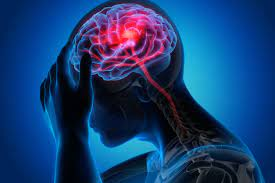

<hr style = "height : 5px;
             width : 100%;
             text-align : left;
             margin-left : 0;">

<h1 style="font-size:250%;"> Context : </h1>


<h3> According to the World Health Organization (WHO) stroke is the 2nd leading cause of death globally, responsible for approximately 11% of total deaths.This dataset is used to predict whether a patient is likely to get stroke based on the input parameters like gender, age, various diseases, and smoking status. Each row in the data provides relavant information about the patient. </h3>

<hr style = "height : 5px;
             width : 100%;
             text-align : left;
             margin-left : 0;">

<h1 style="font-size:250%;"> Atribute information : </h1>



<h3>
    
   **1) id: unique identifier**

   **2) gender: "Male", "Female" or "Other"**

   **3) age: age of the patient**

   **4) hypertension: 0 if the patient doesn't have hypertension, 1 if the patient has hypertension**

   **5) heart_disease: 0 if the patient doesn't have any heart diseases, 1 if the patient has a heart disease**

   **6) ever_married: "No" or "Yes"**

   **7) work_type: "children", "Govt_jov", "Never_worked", "Private" or "Self-employed"**

   **8) Residence_type: "Rural" or "Urban"**

   **9) avg_glucose_level: average glucose level in blood**

   **10) bmi: body mass index**

   **11) smoking_status: "formerly smoked", "never smoked", "smokes" or "Unknown"**

   **target --> stroke: 1 if the patient had a stroke or 0 if not** </h3>


<h3 style = "color: red;"> 
    Note: "Unknown" in smoking_status means that the information is unavailable for this patient </h3>


<hr style = "height : 5px;
             width : 100%;
             text-align : left;
             margin-left : 0;">
             

<h1 style="font-size:250%;"> Content : </h1>


<hr style = "height : 2px;
             width : 100%;
             text-align : left;
             margin-left : 0;">
             
    
## 1) The dataset :

- ### Loading data.
    
- ### Data information and shape.

<hr style = "height : 2px;
             width : 100%;
             text-align : left;
             margin-left : 0;">

## 2) Preprocessing :


- ### Find nulls and impute.
    
- ### Encoding categorical features.

- ### Balance dataset (KmeansSMOTE).

<hr style = "height : 2px;
             width : 100%;
             text-align : left;
             margin-left : 0;">


## 3) Exploratory data analysis (EDA) :


- ### Statistics of the data (summary).
   
- ### Data visualization.

- ### Contingency tables.

<hr style = "height : 2px;
             width : 100%;
             text-align : left;
             margin-left : 0;">
             
## 4) Feature engineering :


- ### Creating features.
   
- ### Dimensionality reduction (PCA).

- ### Feature importances (R.F & M.I).

<hr style = "height : 2px;
             width : 100%;
             text-align : left;
             margin-left : 0;">
             
## 5) Modeling :


- ### Split and standardize.
   
- ### Individual estimators.

- ### Nested cross validation.

- ### Majority vote.

- ### Bagging.

- ### Boosting.

- ### Deep learning (Neural network).


<hr style = "height : 2px;
             width : 100%;
             text-align : left;
             margin-left : 0;">
             
             
## 6) Model evaluation :


- ### Classification metrics.
   
- ### Confusion matrix.

- ### ROC-AUC.

<hr style = "height : 2px;
             width : 100%;
             text-align : left;
             margin-left : 0;">

# 1) The dataset.

In [91]:
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import numpy as np
import pandas as pd 
import time
import tensorflow as tf
from numpy import percentile
from pandas import get_dummies
from imblearn.over_sampling import KMeansSMOTE 
from collections import Counter
from pandas import crosstab
from sklearn.preprocessing import LabelEncoder , KBinsDiscretizer , StandardScaler
from sklearn.impute import KNNImputer
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.feature_selection import SelectFromModel ,mutual_info_classif
from sklearn import metrics
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split,cross_val_score,learning_curve,GridSearchCV ,StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier , GradientBoostingClassifier ,VotingClassifier ,BaggingClassifier
from tensorflow import keras
from tensorflow.keras.callbacks import ReduceLROnPlateau

In [2]:
if tf.config.list_physical_devices('GPU'):
    
    print('GPU:',tf.test.gpu_device_name())
    
else:
    
    print('CPU only')

GPU: /device:GPU:0


## Loading data :

In [3]:
path = '/home/bl4ckc4t/Documents/Datasets/Stroke/healthcare-dataset-stroke-data.csv'

dataset = pd.read_csv(filepath_or_buffer = path)

dataset

id  gender   age  hypertension  heart_disease ever_married  \
0      9046    Male  67.0             0              1          Yes   
1     51676  Female  61.0             0              0          Yes   
2     31112    Male  80.0             0              1          Yes   
3     60182  Female  49.0             0              0          Yes   
4      1665  Female  79.0             1              0          Yes   
...     ...     ...   ...           ...            ...          ...   
5105  18234  Female  80.0             1              0          Yes   
5106  44873  Female  81.0             0              0          Yes   
5107  19723  Female  35.0             0              0          Yes   
5108  37544    Male  51.0             0              0          Yes   
5109  44679  Female  44.0             0              0          Yes   

          work_type Residence_type  avg_glucose_level   bmi   smoking_status  \
0           Private          Urban             228.69  36.6  formerly smoked   
1     Self-employed          Rural             202.21   NaN     never smoked   
2           Private          Rural             105.92  32.5     never smoked   
3           Private          Urban             171.23  34.4           smokes   
4     Self-employed          Rural             174.12  24.0     never smoked   
...             ...            ...                ...   ...              ...   
5105        Private          Urban              83.75   NaN     never smoked   
5106  Self-employed          Urban             125.20  40.0     never smoked   
5107  Self-employed          Rural              82.99  30.6     never smoked   
5108        Private          Rural             166.29  25.6  formerly smoked   
5109       Govt_job          Urban              85.28  26.2          Unknown   

      stroke  
0          1  
1          1  
2          1  
3          1  
4          1  
...      ...  
5105       0  
5106       0  
5107       0  
5108       0  
5109       0  

[5110 rows x 12 columns]

## Data information and shape :

In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [5]:
print('CLASS DISTRIBUTION : ',Counter(dataset.stroke))

CLASS DISTRIBUTION :  Counter({0: 4861, 1: 249})


In [6]:
print(f"""DATA SHAPE:
--------------------
rows --> {dataset.shape[0]}
--------------------
columns --> {dataset.shape[1]}
--------------------
""")

DATA SHAPE:
--------------------
rows --> 5110
--------------------
columns --> 12
--------------------



# 2) Preprocessing.

## Find nulls and impute :

In [7]:
nulls = dataset.isnull().sum()

nulls = pd.DataFrame(data = nulls ,columns = ['missing values'])

nulls

missing values
id                              0
gender                          0
age                             0
hypertension                    0
heart_disease                   0
ever_married                    0
work_type                       0
Residence_type                  0
avg_glucose_level               0
bmi                           201
smoking_status                  0
stroke                          0

In [8]:
print(f'bmi missing values: {round(( 201 / dataset.shape[0])*100,3)}% of instances')

bmi missing values: 3.933% of instances


In [9]:
dataset = dataset.drop(columns = 'id') 

imputer = KNNImputer(missing_values = np.nan,
                     n_neighbors = 6,
                     copy = True)



imputed_bmi = imputer.fit_transform(X = dataset[['bmi']]) 

dataset['bmi'] = imputed_bmi

n_nulls = (dataset.bmi == np.nan).sum()

n_nulls

0

## Encoding categorical features :

In [10]:
def data_encoder(data):
    
    new_data = data.copy()

    lb_encoder = LabelEncoder()
    
    cols = data.columns
    
    drop_first = False
    
    for col in cols:
        
        if str(new_data[col].dtype)  == 'object' and len(new_data[col].unique()) <= 3:
            
            if len(new_data[col].unique()) == 3:
                
                drop_first = True
            else:
                drop_first = False
        
            dummies = get_dummies(data = new_data[col],drop_first = drop_first)
            
            new_data = new_data.join(dummies)
            
            new_data = new_data.drop(columns = col)
            
        elif str(new_data[col].dtype)  == 'object' and len(new_data[col].unique()) > 3:
            
            new_data[col] = lb_encoder.fit_transform(new_data[col])
        else:
            continue
             
    return new_data


encoded_data = data_encoder(dataset)

encoded_data.head()

age  hypertension  heart_disease  work_type  avg_glucose_level        bmi  \
0  67.0             0              1          2             228.69  36.600000   
1  61.0             0              0          3             202.21  28.893237   
2  80.0             0              1          2             105.92  32.500000   
3  49.0             0              0          2             171.23  34.400000   
4  79.0             1              0          3             174.12  24.000000   

   smoking_status  stroke  Male  Other  No  Yes  Rural  Urban  
0               1       1     1      0   0    1      0      1  
1               2       1     0      0   0    1      1      0  
2               2       1     1      0   0    1      1      0  
3               3       1     0      0   0    1      0      1  
4               2       1     0      0   0    1      1      0

## Balance dataset :

In [11]:
X_imb = encoded_data.drop(columns = 'stroke')

y_imb = encoded_data['stroke']


ksmote = KMeansSMOTE(random_state = 101,
                     k_neighbors = 7,
                     n_jobs = -1,
                     cluster_balance_threshold = 0)

KMeansSMOTE()

X_resampled, y_resampled = ksmote.fit_resample(X_imb, y_imb)

print('OVERSAMPLED DATASET SHAPE : ', Counter(y_resampled))

OVERSAMPLED DATASET SHAPE :  Counter({1: 4864, 0: 4861})


In [12]:
balanced_data = pd.DataFrame(data = X_resampled,columns = X_imb.columns)

balanced_data = pd.concat([balanced_data , y_resampled],axis = 1)

balanced_data.drop_duplicates()

balanced_data.tail()

age  hypertension  heart_disease  work_type  avg_glucose_level  \
9720  80.478452             0              0          2         255.448331   
9721  68.000000             0              0          2         234.528893   
9722  74.895746             0              0          2         219.437840   
9723  76.176846             0              0          1         257.222826   
9724  78.879566             0              1          2         226.120104   

            bmi  smoking_status  Male  Other  No  Yes  Rural  Urban  stroke  
9720  29.977573               3     1      0   0    1      0      0       1  
9721  42.317546               1     0      0   0    1      0      0       1  
9722  32.154837               0     1      0   0    1      0      0       1  
9723  33.983318               1     0      0   0    1      0      1       1  
9724  29.690795               1     0      0   0    1      0      1       1

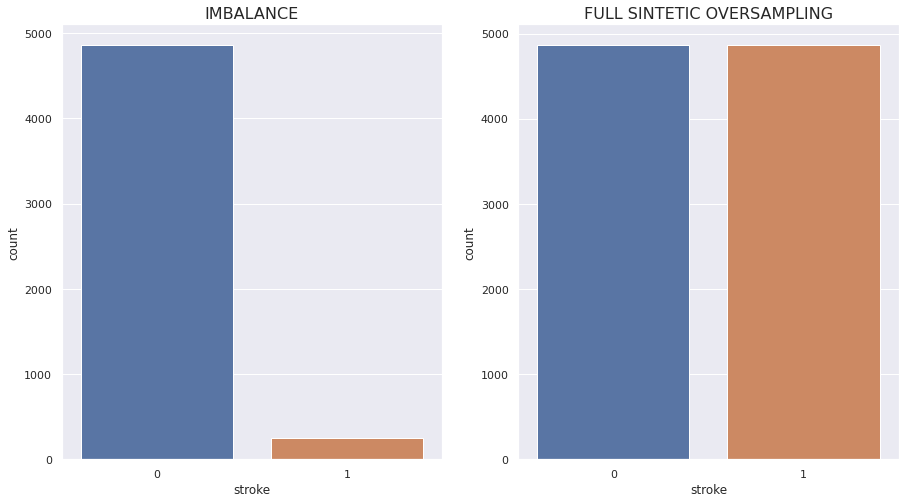

In [13]:
sns.set_theme(style="darkgrid")

fig ,ax  = plt.subplots(nrows = 1 , ncols = 2 , figsize = (15,8))

sns.countplot(x = 'stroke' ,data = encoded_data ,ax = ax[0])

sns.countplot(x = 'stroke' ,data = balanced_data ,ax = ax[1])

ax[0].set_title('IMBALANCE',fontsize = 16)

ax[1].set_title('FULL SINTETIC OVERSAMPLING',fontsize = 16)

plt.show()

# 3) Exploratory data analysis (EDA).

## Statistics of the data (summary) :

In [14]:
dataset.describe()

age  hypertension  heart_disease  avg_glucose_level  \
count  5110.000000   5110.000000    5110.000000        5110.000000   
mean     43.226614      0.097456       0.054012         106.147677   
std      22.612647      0.296607       0.226063          45.283560   
min       0.080000      0.000000       0.000000          55.120000   
25%      25.000000      0.000000       0.000000          77.245000   
50%      45.000000      0.000000       0.000000          91.885000   
75%      61.000000      0.000000       0.000000         114.090000   
max      82.000000      1.000000       1.000000         271.740000   

               bmi       stroke  
count  5110.000000  5110.000000  
mean     28.893237     0.048728  
std       7.698018     0.215320  
min      10.300000     0.000000  
25%      23.800000     0.000000  
50%      28.400000     0.000000  
75%      32.800000     0.000000  
max      97.600000     1.000000

In [15]:
def get_iqr(data):
    
    iqrs = []
    
    for col in data.columns:
        
        iqr = percentile(a = data[col] , q = 75.0) - percentile(a = data[col], q = 25.0)
        
        iqrs.append(round(iqr,4))
        
    return iqrs


print(f"IQRs: {get_iqr( dataset[['bmi','age','avg_glucose_level']] )}")

IQRs: [9.0, 36.0, 36.845]


## Data visualization:

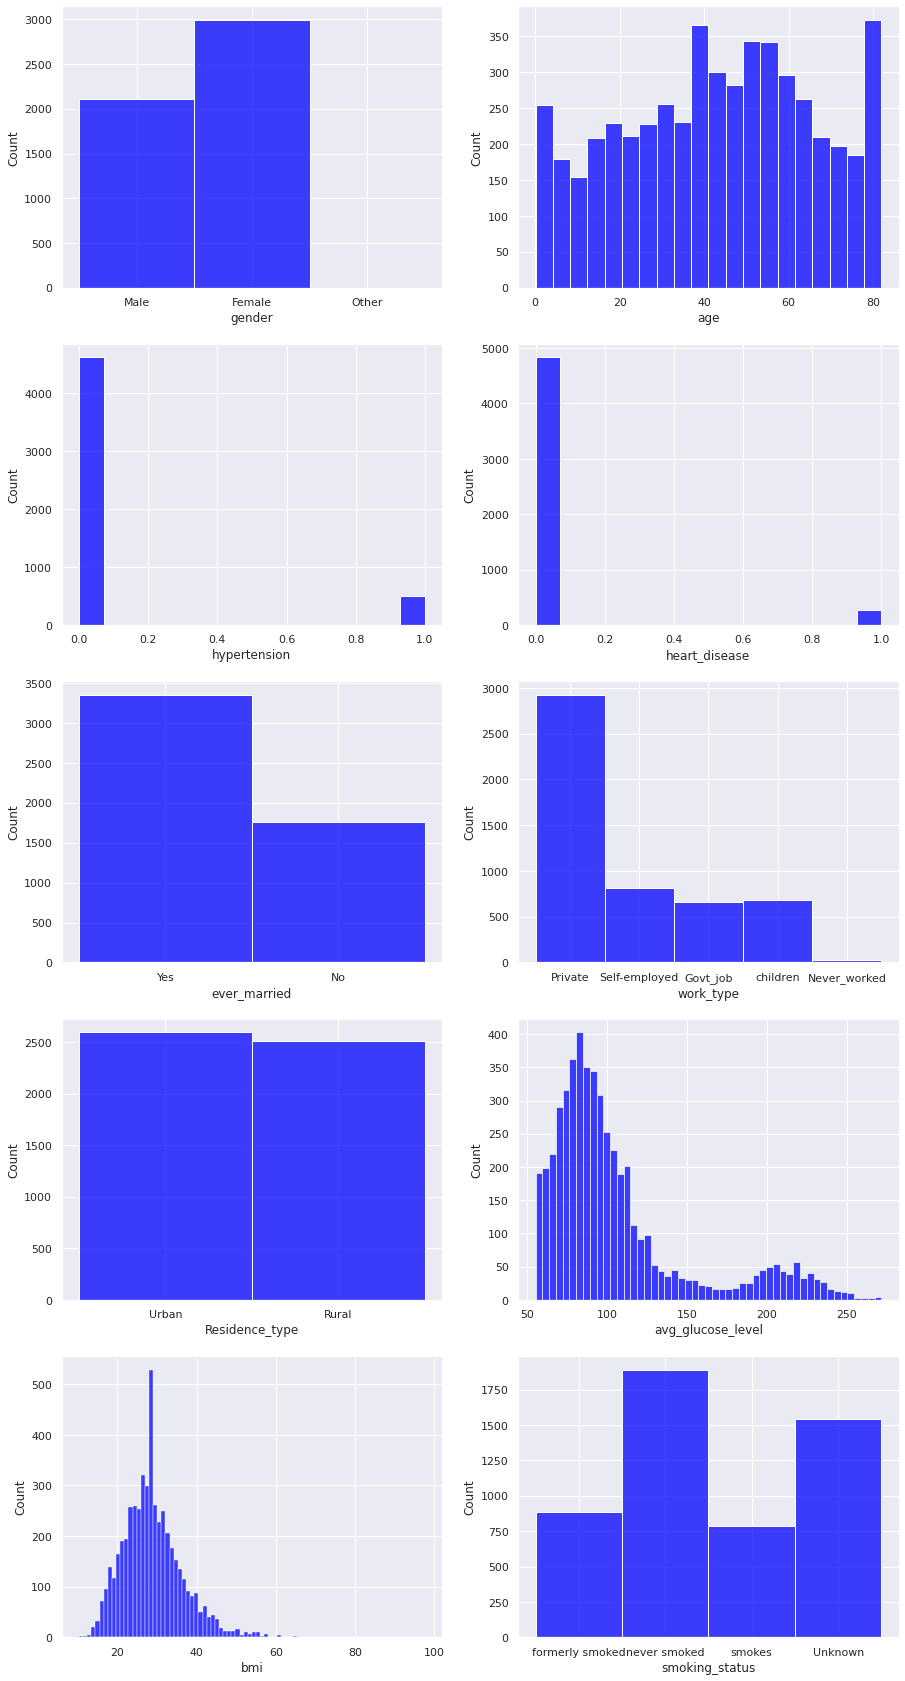

In [16]:
fig , ax = plt.subplots(nrows = 5 ,ncols = 2 ,figsize = (15,30))

k = 0

for i in range(5):
    
    for j in range(2):

        sns.histplot(data = dataset[dataset.drop(columns = 'stroke').columns[k]],
                        ax = ax[ i , j ],
                        color = 'blue')

        k += 1
        
plt.show()

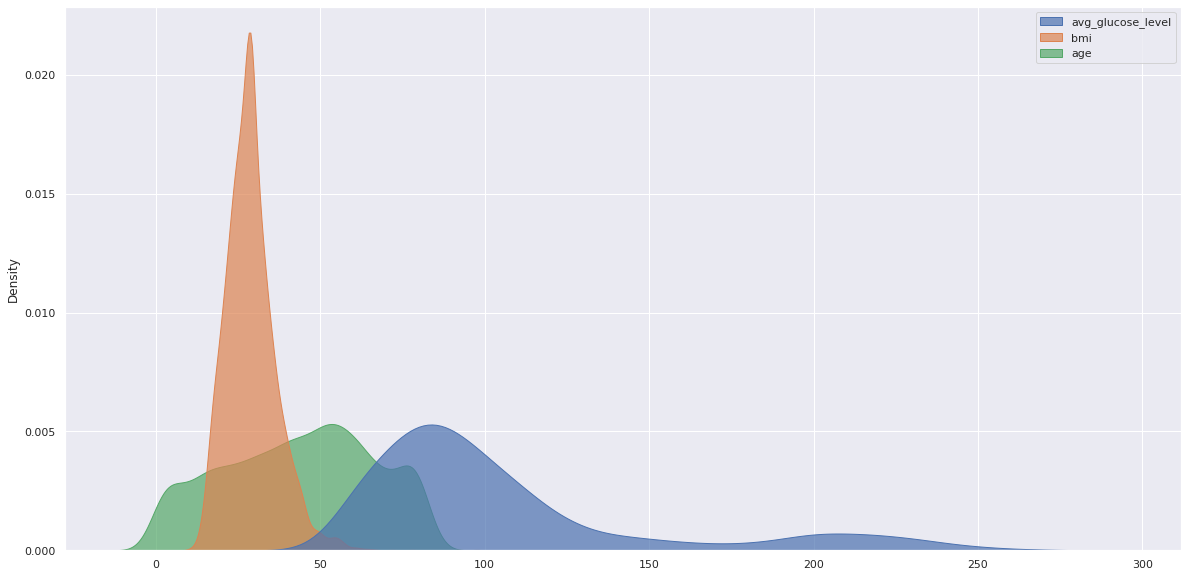

In [17]:
plt.figure(figsize = (20,10))

sns.kdeplot(data = dataset[['avg_glucose_level','bmi','age']],shade = True,alpha = 0.7)

plt.show()

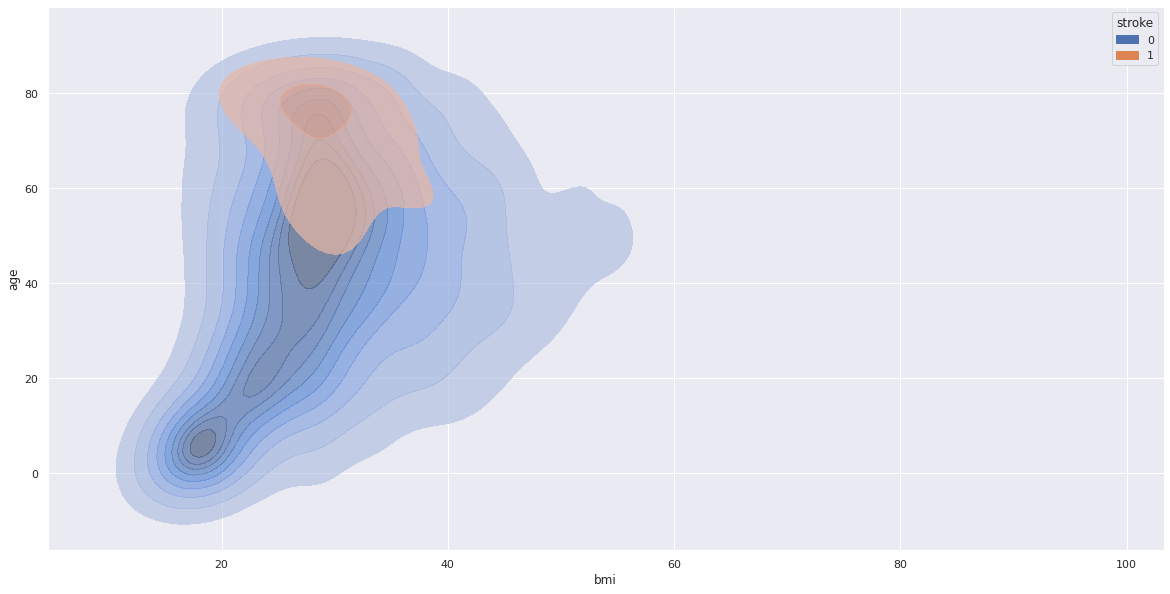

In [18]:
plt.figure(figsize = (20,10))

sns.kdeplot(y = dataset.age,
            x = dataset.bmi,
            hue = dataset.stroke,
            shade = True,
            alpha = 0.7)
plt.show()

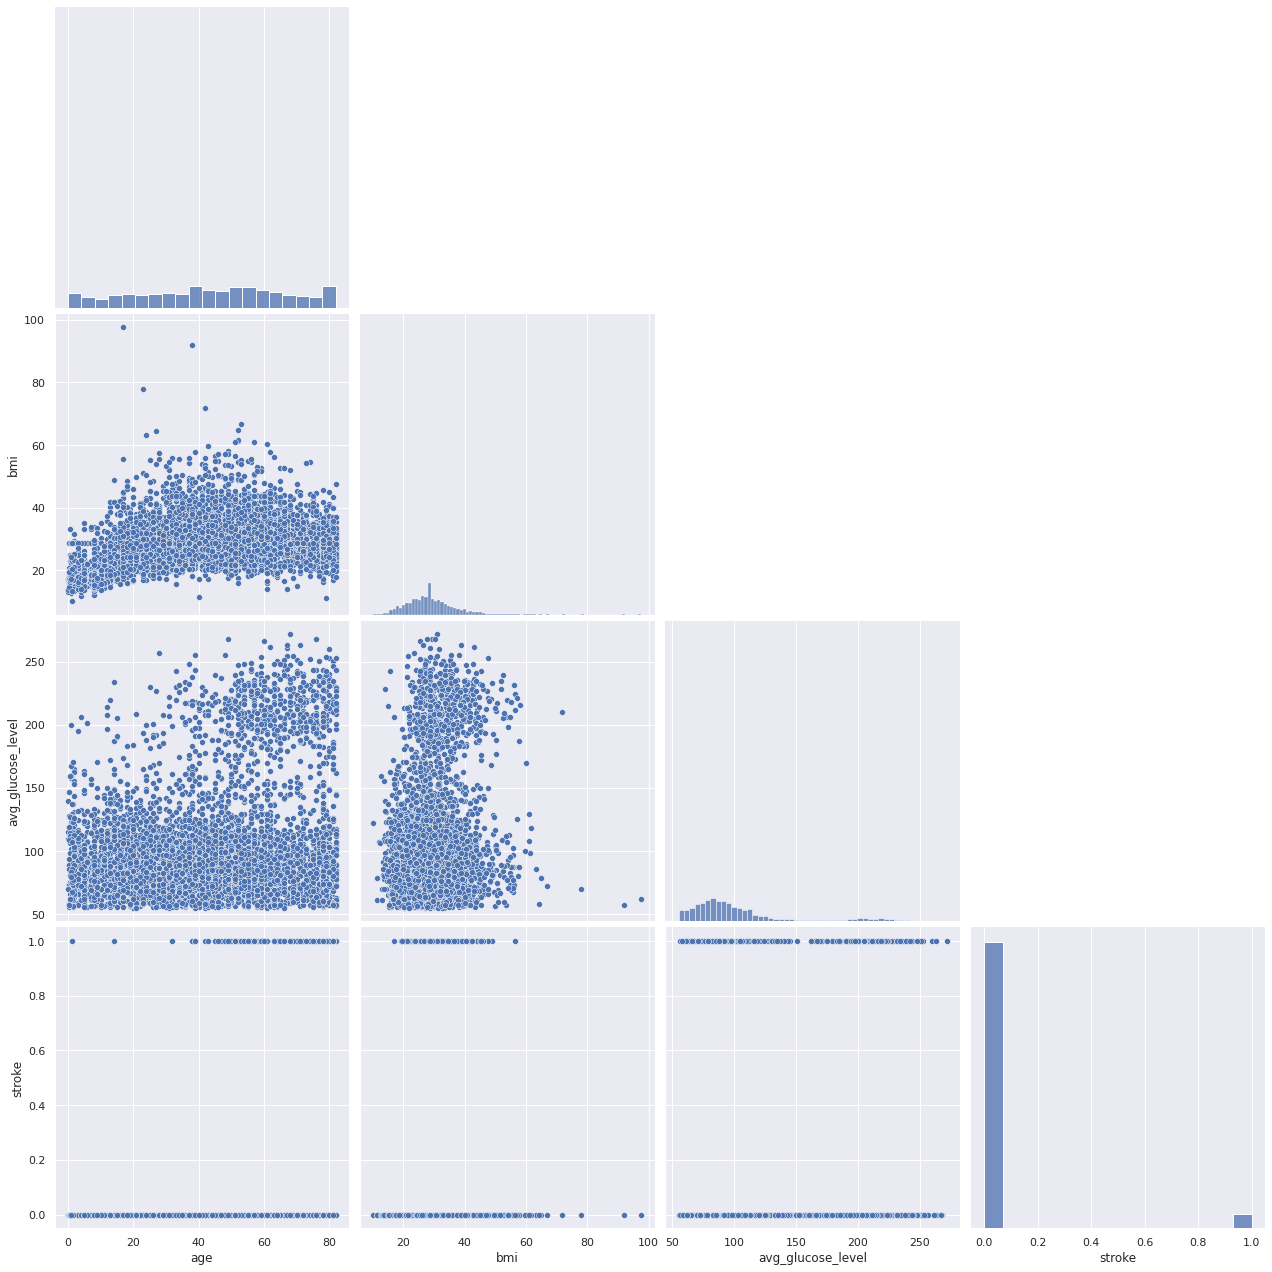

In [19]:
sns.pairplot(data = dataset[['age','bmi','avg_glucose_level','stroke']],
             height = 4.5,
             aspect = 1,
             corner = True,
             kind = 'scatter')

plt.show()

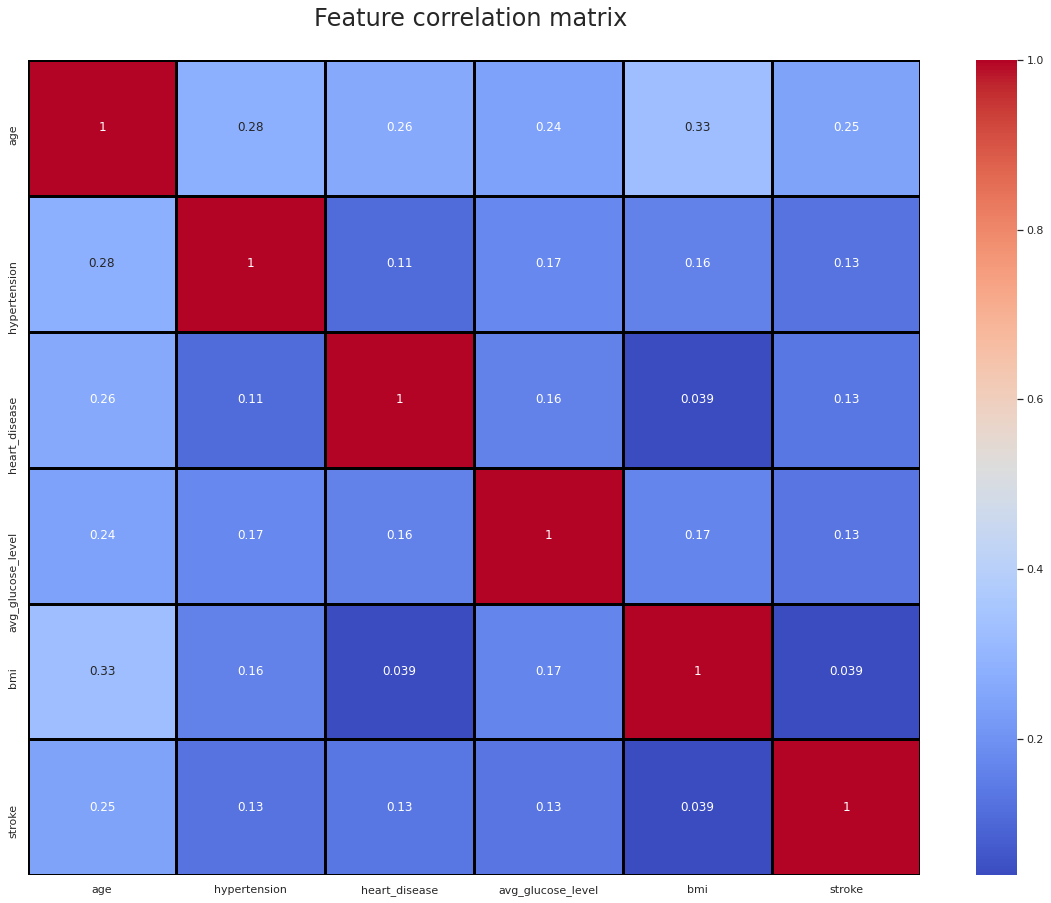

In [20]:
plt.figure(figsize = (20,15))
sns.heatmap(data = dataset.corr(),
            annot = True,
            cmap = 'coolwarm',
            robust = True,
            linewidths = 3,
            linecolor = 'black')
plt.title('Feature correlation matrix \n',fontsize = 24)
plt.show()

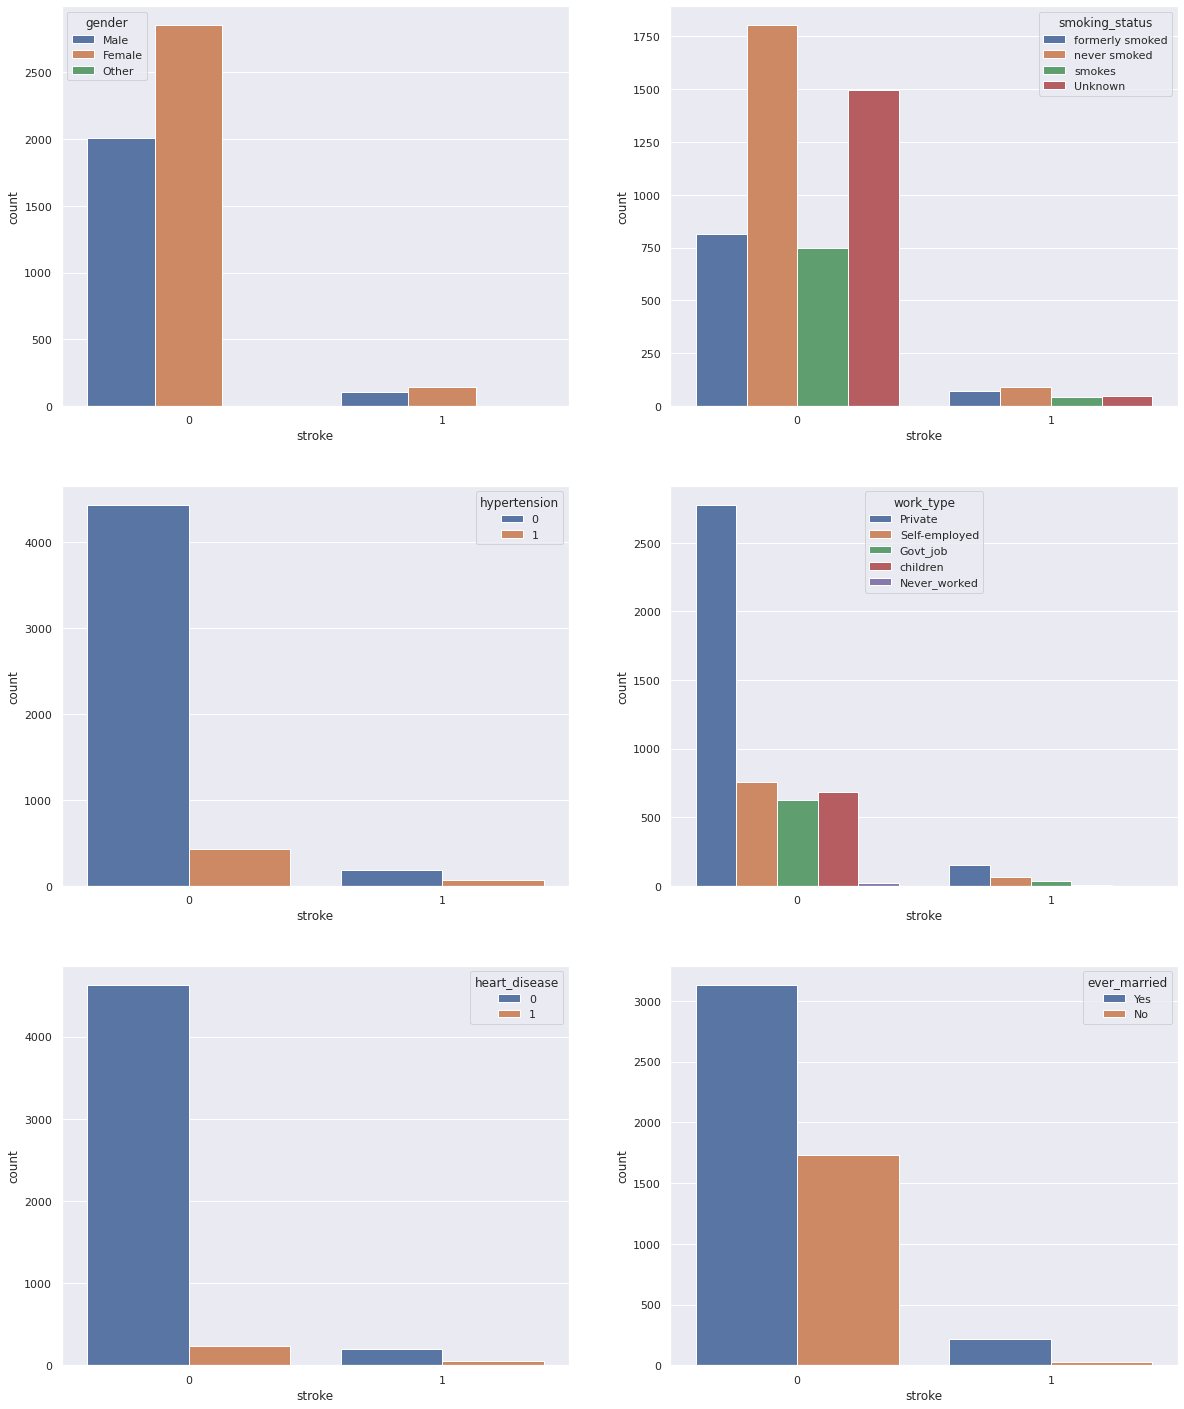

In [21]:
fig  , ax = plt.subplots(nrows = 3 ,ncols = 2, figsize = (20,25))

features = ['gender','smoking_status','hypertension',
            'work_type','heart_disease','ever_married']

f = 0

for i in range(3):
    
    for j in range(2):
        
        
        if f == len(features):
            
            continue
            
        else:
            
            sns.countplot(x = 'stroke',hue = features[f] ,data = dataset, ax = ax[i,j])
            
            f += 1
         
        
plt.show()

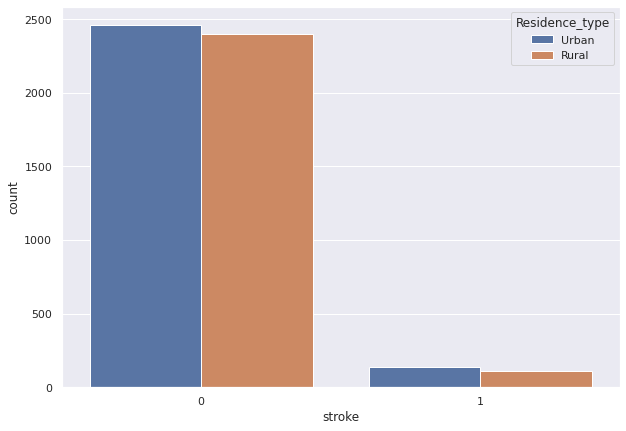

In [22]:
plt.figure(figsize = (10,7))
sns.countplot(x = 'stroke',hue = 'Residence_type',data = dataset)
plt.show()

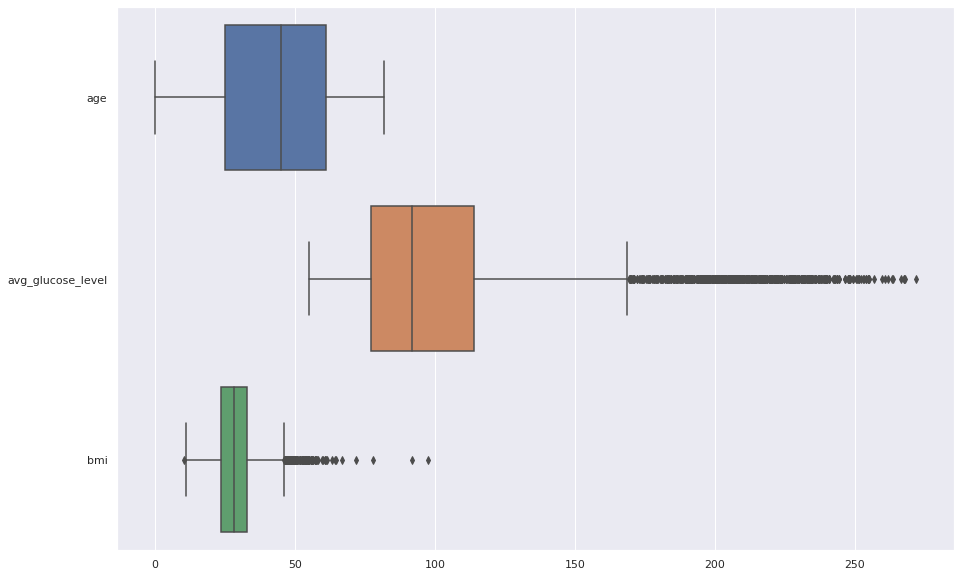

In [23]:
plt.figure(figsize = (15,10))

sns.boxplot(data = dataset[['age','avg_glucose_level','bmi']] ,orient="h" ) 

plt.show()

## Contingency tables :

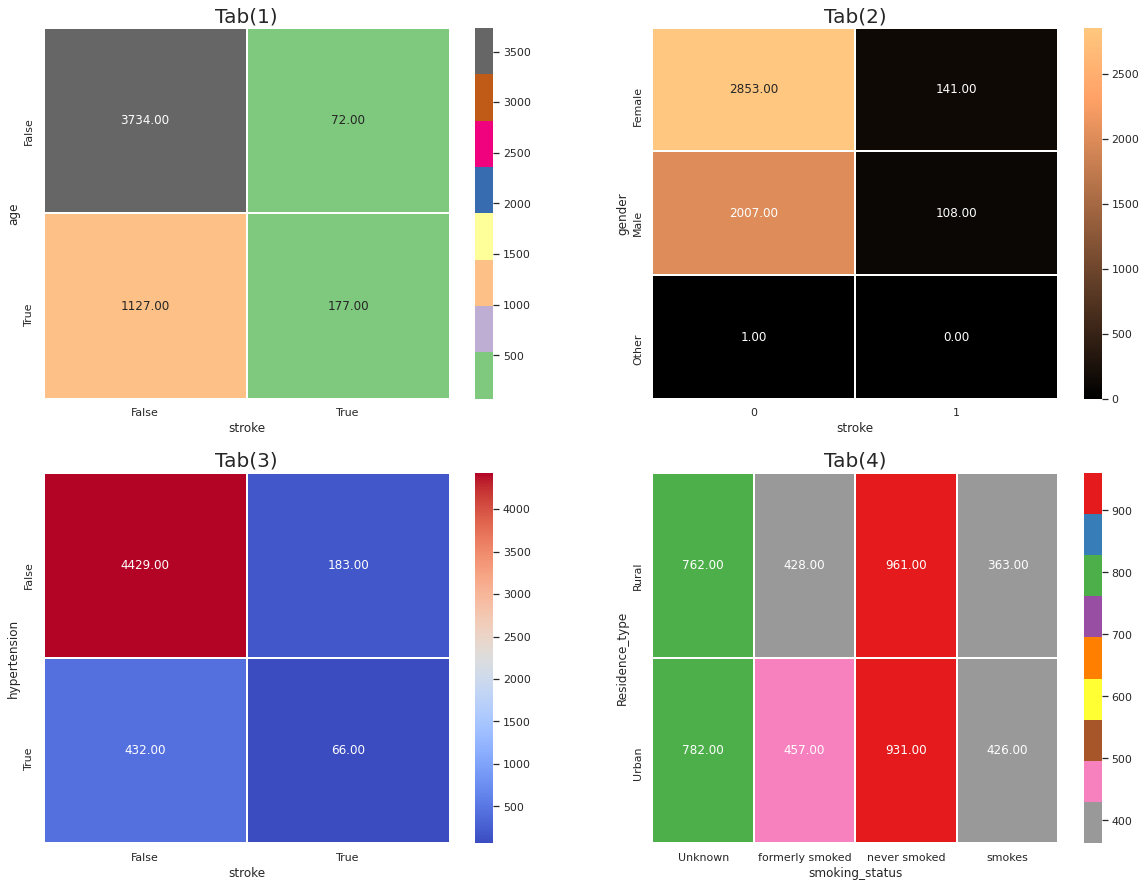

In [24]:


colors = ['Accent','copper','coolwarm','Set1_r']

tabs = [pd.crosstab(dataset['age'] > 60, dataset['stroke'] == 1),
        
        pd.crosstab(dataset['gender'], dataset['stroke']),
        
        pd.crosstab(dataset['hypertension']  ==  1 , dataset['stroke'] == 1),
        
        pd.crosstab(dataset['Residence_type']  , dataset['smoking_status'])]


fig , ax = plt.subplots(nrows = 2 , ncols = 2 , figsize = (20,15))

c = 0

for i in range(2):
    
    for j in range(2):
        
        sns.heatmap(data = tabs[c] ,
                    cmap = colors[c],
                    linewidths = 2,
                    fmt='.2f',
                    annot = True , ax = ax[i,j])
        
        c += 1


        ax[i,j].set_title(f'Tab({c})',fontsize = 20)
        
        
plt.show()

# 4) Feature engineering.

## Creating features :

In [25]:
kms = KMeans(n_clusters = 2)

kms.fit(balanced_data.drop(columns = 'stroke'),balanced_data['stroke'])

balanced_data['cluster'] =  kms.predict(balanced_data.drop(columns = 'stroke'))

In [26]:
balanced_data.head()

age  hypertension  heart_disease  work_type  avg_glucose_level        bmi  \
0  67.0             0              1          2             228.69  36.600000   
1  61.0             0              0          3             202.21  28.893237   
2  80.0             0              1          2             105.92  32.500000   
3  49.0             0              0          2             171.23  34.400000   
4  79.0             1              0          3             174.12  24.000000   

   smoking_status  Male  Other  No  Yes  Rural  Urban  stroke  cluster  
0               1     1      0   0    1      0      1       1        0  
1               2     0      0   0    1      1      0       1        0  
2               2     1      0   0    1      1      0       1        1  
3               3     0      0   0    1      0      1       1        0  
4               2     0      0   0    1      1      0       1        0

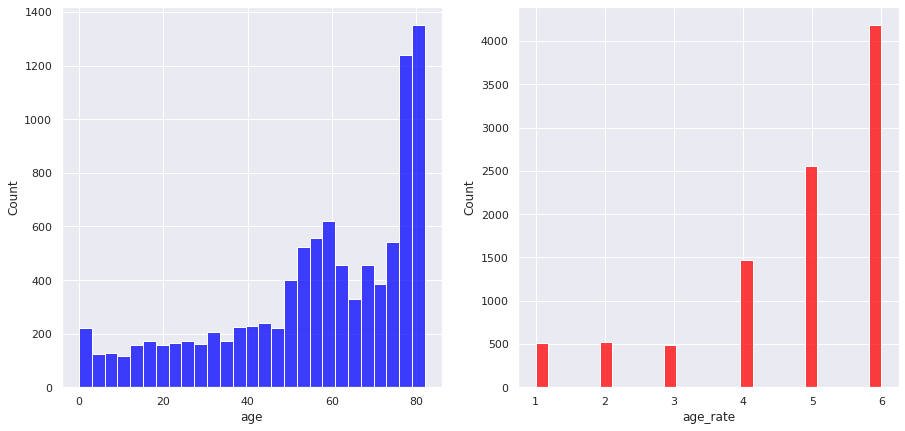

In [27]:
def age_segmenter(col):
    
    new_col = col.copy()
    
    for k in range(len(col)):
        
        if col[k] > 0 and col[k] <= 10:

            new_col[k] = 1
            
        elif col[k] > 10 and col[k] < 21:
            
            new_col[k] = 2 
            
        elif new_col[k] >= 21 and col[k] < 30:
            
            new_col[k] = 3 
    
        elif col[k] >= 30 and col[k] < 50:
            
            new_col[k] = 4 
            
        elif col[k] >= 50 and col[k] < 65:
            
            new_col[k] = 5 
            
        elif col[k] >= 65 and col[k] < 100:
            
            new_col[k] = 6
            
        else:
            continue
            
    return new_col

seg_age = age_segmenter(balanced_data['age'])

aug_data = balanced_data.copy()

aug_data['age_rate'] = seg_age 

fig , ax = plt.subplots(nrows = 1 ,ncols = 2 , figsize = (15,7))

sns.histplot(data = aug_data['age'],color = 'blue',ax = ax[0])

sns.histplot(data = aug_data['age_rate'],color = 'red',ax = ax[1])

plt.show()

In [28]:
aug_data.head(1)

age  hypertension  heart_disease  work_type  avg_glucose_level   bmi  \
0  67.0             0              1          2             228.69  36.6   

   smoking_status  Male  Other  No  Yes  Rural  Urban  stroke  cluster  \
0               1     1      0   0    1      0      1       1        0   

   age_rate  
0       6.0

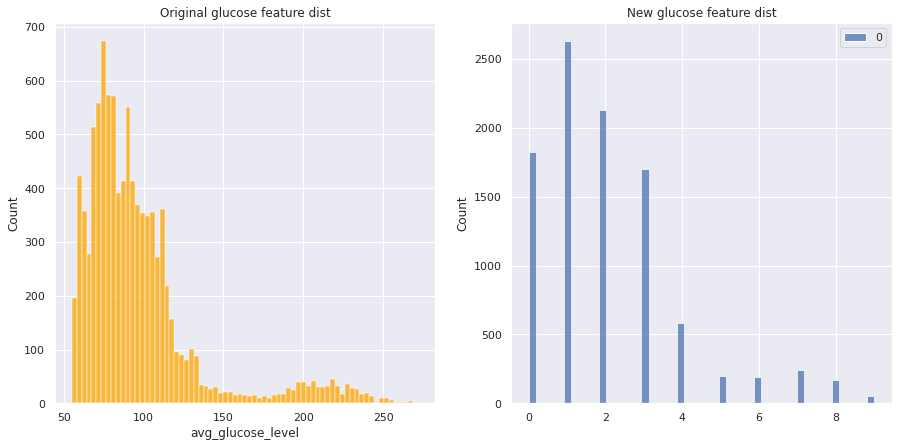

In [29]:

kbins = KBinsDiscretizer(n_bins=10,encode='ordinal', strategy='kmeans')

glucose_rate = kbins.fit_transform(aug_data[['avg_glucose_level']])

aug_data['glucose_rate'] = glucose_rate

fig , ax = plt.subplots(nrows = 1 ,ncols = 2 , figsize = (15,7))

sns.histplot(data = aug_data['avg_glucose_level'],color = 'orange',ax = ax[0])

ax[0].set_title('Original glucose feature dist')

sns.histplot(data = glucose_rate,ax = ax[1])

ax[1].set_title('New glucose feature dist')


plt.show()

In [30]:
aug_data.head(1)

age  hypertension  heart_disease  work_type  avg_glucose_level   bmi  \
0  67.0             0              1          2             228.69  36.6   

   smoking_status  Male  Other  No  Yes  Rural  Urban  stroke  cluster  \
0               1     1      0   0    1      0      1       1        0   

   age_rate  glucose_rate  
0       6.0           8.0

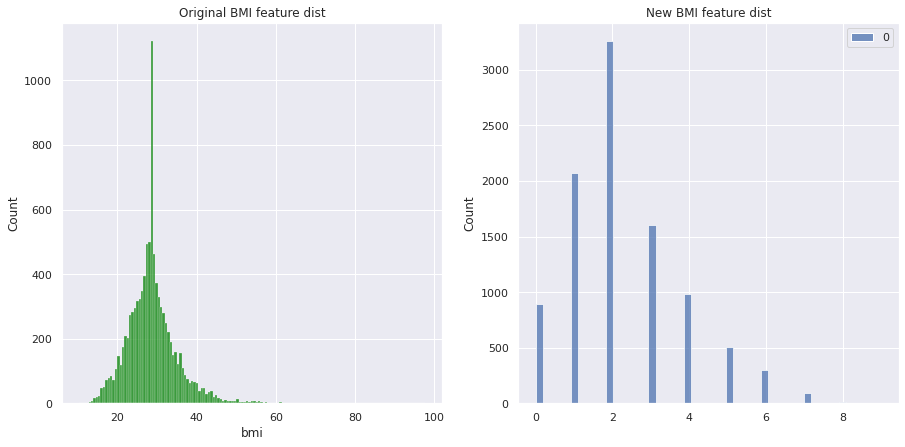

In [31]:
bmi_rate = kbins.fit_transform(aug_data[['bmi']])

aug_data['bmi_rate'] = bmi_rate

fig , ax = plt.subplots(nrows = 1 ,ncols = 2 , figsize = (15,7))

sns.histplot(data = aug_data['bmi'],color = 'green',ax = ax[0])

ax[0].set_title('Original BMI feature dist')

sns.histplot(data = bmi_rate,ax = ax[1])

ax[1].set_title('New BMI feature dist')

plt.show()

In [32]:
aug_data.head(1)

age  hypertension  heart_disease  work_type  avg_glucose_level   bmi  \
0  67.0             0              1          2             228.69  36.6   

   smoking_status  Male  Other  No  Yes  Rural  Urban  stroke  cluster  \
0               1     1      0   0    1      0      1       1        0   

   age_rate  glucose_rate  bmi_rate  
0       6.0           8.0       5.0

## Dimensionality reduction (PCA):

In [33]:
pca = PCA(n_components = None,
          copy = True,
          whiten = False,
          svd_solver = 'auto',
          random_state = 101)


transformed_data = pca.fit_transform(X = aug_data[['bmi','age','avg_glucose_level']])

feature_variance = pca.explained_variance_ratio_

print(feature_variance)

[0.7245643  0.25638021 0.01905549]


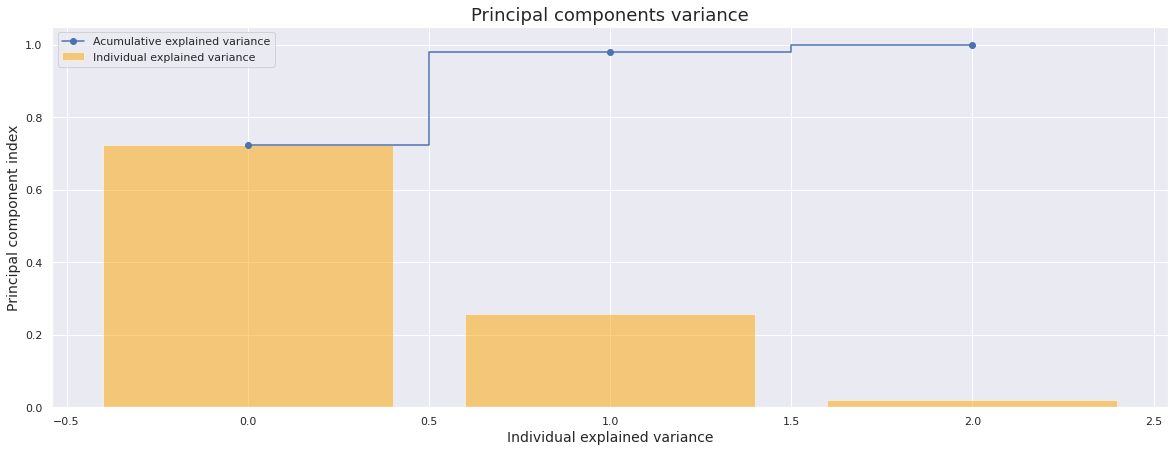

In [34]:
cum_var_exp = np.cumsum(feature_variance)


plt.figure(figsize=(20,7))

plt.bar(x = range(0,3),height = feature_variance , alpha = 0.5 ,
                                           align = 'center',
                                           label = 'Individual explained variance',
                                           color = 'orange')

plt.step(x = range(0,3),y = cum_var_exp , where = 'mid',
                                           label = 'Acumulative explained variance',
                                           marker = 'o')

plt.legend(loc='best')
plt.title('Principal components variance',fontsize=18)
plt.xlabel('Individual explained variance',fontsize=14)
plt.ylabel('Principal component index',fontsize=14)
plt.show()

In [35]:

pca = PCA(n_components = 2,
          copy = True,
          whiten = False,
          svd_solver = 'auto',
          random_state = 101)


data_comp = pca.fit_transform(X = aug_data.drop(columns = 'stroke'))

fig = px.scatter_3d(x = data_comp[:,0],
                    y = data_comp[:,1],
                    z = aug_data.stroke,
                    opacity = 0.7,
                    color = aug_data.stroke,
                    width = 1000,
                    height = 800)

px.scatter_3d()
fig.show()

## Feature importances (R.F & M.I):

In [36]:

X_ = aug_data.drop(columns = 'stroke')

y_ = aug_data['stroke']

rf = RandomForestClassifier(n_estimators = 100, criterion = 'entropy',random_state = 101)

rf.fit(X = X_ , y = y_)

importances = rf.feature_importances_

indexs = np.argsort(a = importances)[::-1]

columns = X_.columns

print('Feature importances: \n')

for feature in range(X_.shape[1]):
    
    print(f'{feature + 1 }) {columns[feature].upper()}   [{round(importances[indexs[feature]],4)}] \n')


Feature importances: 

1) AGE   [0.2504] 

2) HYPERTENSION   [0.1586] 

3) HEART_DISEASE   [0.1132] 

4) WORK_TYPE   [0.0875] 

5) AVG_GLUCOSE_LEVEL   [0.0525] 

6) BMI   [0.0506] 

7) SMOKING_STATUS   [0.0455] 

8) MALE   [0.0445] 

9) OTHER   [0.0384] 

10) NO   [0.0381] 

11) YES   [0.0347] 

12) RURAL   [0.0293] 

13) URBAN   [0.0245] 

14) CLUSTER   [0.0131] 

15) AGE_RATE   [0.0105] 

16) GLUCOSE_RATE   [0.0087] 

17) BMI_RATE   [0.0] 



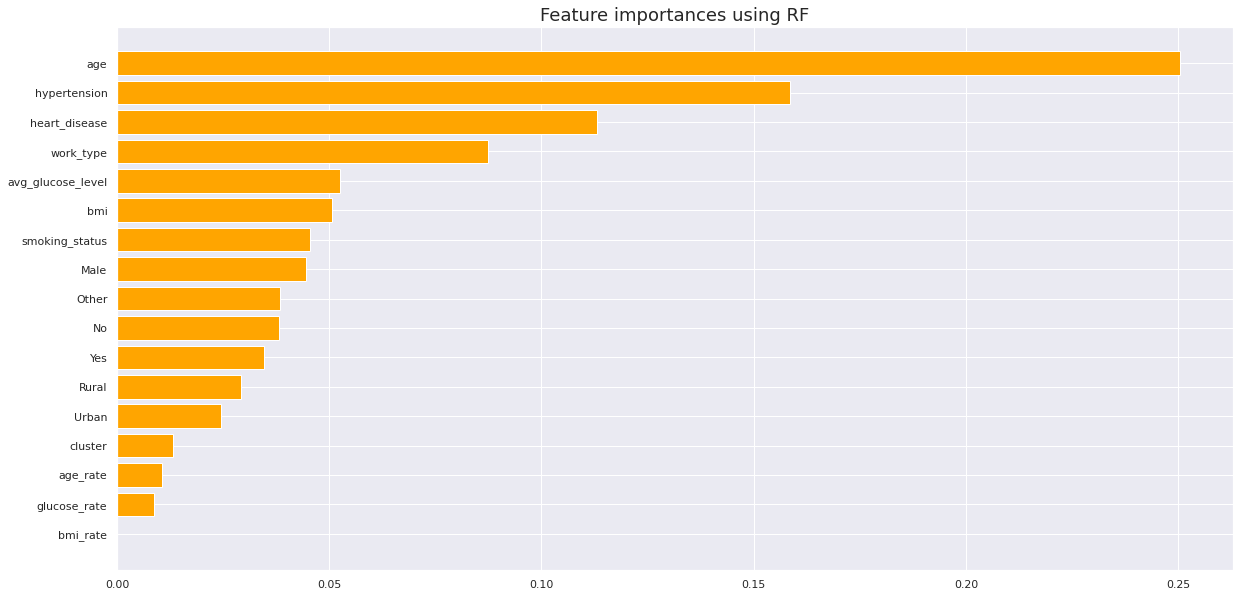

In [37]:
plt.figure(figsize = (20,10))

plt.title('Feature importances using RF',fontsize = 18)

plt.barh(width = importances[indexs][::-1],
         y = X_.columns[::-1],
         color = 'orange')

plt.show()

In [38]:
sfm = SelectFromModel(estimator = rf , threshold = 0.07 )

selected = sfm.fit_transform(X = X_ ,  y = y_)

for k in range(selected.shape[1]):
    
    print(columns[indexs[k]] , importances[indexs[k]])

age 0.2503885039219955
age_rate 0.15859328422785407
avg_glucose_level 0.11316260285017889
bmi 0.08748283381381647


In [39]:
mti = mutual_info_classif(X = X_,
                          y = y_,
                          n_neighbors = 5,
                          copy = True,
                          random_state = 101)

ind = np.argsort(a = mti)[::-1]

for k in range(X_.shape[1]):
    
    print(columns[ind[k]] , mti[ind[k]])

age 0.5208379373058569
bmi 0.4239878072626053
age_rate 0.25106335125095613
No 0.10421587483156891
work_type 0.07902812478715626
bmi_rate 0.06318927441387201
avg_glucose_level 0.06228812310418119
smoking_status 0.046009896341101086
glucose_rate 0.031812481168936646
Male 0.03069078205998954
Rural 0.027395937278051896
Urban 0.026099203136432436
cluster 0.021645983338497654
Yes 0.005310797650042165
heart_disease 0.0
hypertension 0.0
Other 0.0


# 5) Modeling.

## Split and standardize:

In [40]:

X = aug_data.drop(columns = 'stroke').values

y = aug_data['stroke'].values

X_train , X_test ,y_train , y_test = train_test_split(X , y , random_state = 101,
                                                                       test_size = 0.2,
                                                                       stratify = y)
scaler = StandardScaler()

X_train_std = scaler.fit_transform(X_train)

X_test_std = scaler.fit_transform(X_test)

print(f"""| Train shape | Test shape | 
----------------------------
| {X_train.shape}   | {X_test.shape}  |""")

| Train shape | Test shape | 
----------------------------
| (7780, 17)   | (1945, 17)  |


## Prove individual estimators:

In [41]:

train_perf = []

test_perf = []


models = [SVC(C = 1000 ,
              kernel = 'rbf',
              gamma = 0.01,
              random_state = 101),
          
          LogisticRegression(penalty = 'l2',
                            C = 10,
                            random_state = 101),
          
          KNeighborsClassifier(n_neighbors = 7,
                               p = 2),
          
          DecisionTreeClassifier(max_depth = 10,
                                 random_state = 101,
                                 criterion = 'entropy'),
          
          RandomForestClassifier(n_estimators = 200 ,
                                 random_state = 101)]



for model in models:

    model.fit(X_train_std, y_train)
    
    train_score = model.score(X_train_std,y_train)
    
    test_score = model.score(X_test_std, y_test)

    train_perf.append(train_score)

    test_perf.append(test_score)


est_summary = pd.DataFrame(data = [train_perf ,test_perf] , columns = ['SVM','LOGR','KNN','DECT','RANDF'],
                          index = ['TRAIN SCORE:','TEST SCORE:']) 
est_summary

SVM      LOGR       KNN      DECT     RANDF
TRAIN SCORE:  0.935604  0.872751  0.936632  0.937275  1.000000
TEST SCORE:   0.930591  0.882776  0.934704  0.907455  0.968123

In [42]:

def plot_learning_curve(estimator, X ,y):

    est_pipe = Pipeline(steps = [('scaler', StandardScaler()),
                                ('estimator', estimator)])

    train_sizes  , train_scores , test_scores = learning_curve(estimator = est_pipe,
                                                              X = X,
                                                              y = y,
                                                              train_sizes = np.array([0.1, 0.3, 0.5 , 0.7, 1.0]),
                                                              cv = 10,
                                                              n_jobs = -1,
                                                              scoring = 'accuracy',
                                                              random_state = 101) 


    train_mean = np.mean(train_scores,axis = 1)

    train_std = np.std(train_scores ,axis = 1)

    test_mean = np.mean(test_scores,axis = 1)

    test_std = np.std(test_scores,axis = 1)

    plt.figure(figsize = (10,7))

    plt.plot(train_sizes , train_mean ,color = 'blue' , marker = 'o',markersize = 5,label = 'Train accuracy')

    plt.fill_between(x = train_sizes ,
                     y1 = (train_mean + train_std),
                     y2 = (train_mean - train_std),
                     alpha = 0.15,
                     color = 'blue')

    plt.plot(train_sizes , test_mean , color = 'red' , marker = 'o',label = 'Validation accuracy')

    plt.fill_between(x = train_sizes ,
                     y1 = (test_mean + test_std),
                     y2 = (test_mean - test_std),
                     alpha = 0.15,
                     color = 'red')

    plt.title(f'{estimator.__class__.__name__} learning curve',fontsize = 18)
    plt.xlabel('Number of training samples')
    plt.ylabel('Accuracy')
    plt.legend(loc = 'lower right')
    plt.show()

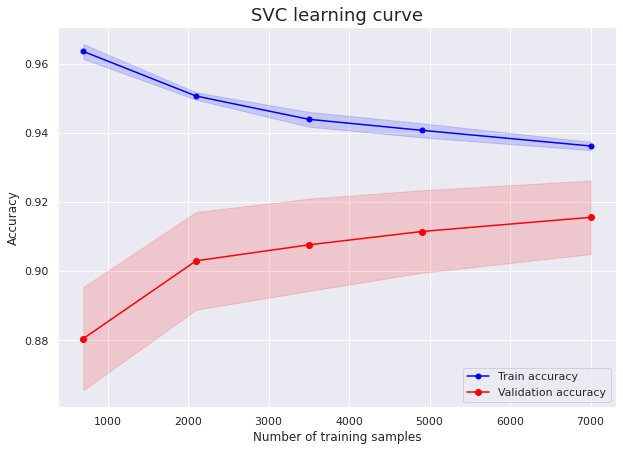

In [43]:
plot_learning_curve(models[0], X_train ,y_train)

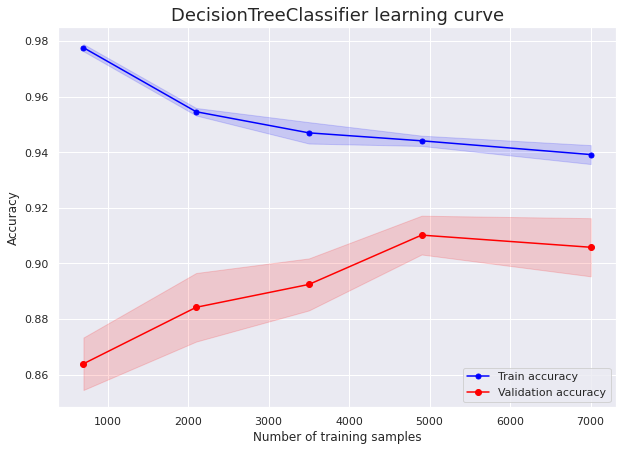

In [44]:
plot_learning_curve(models[3],X_train ,y_train)

## Nested cross validation :

In [45]:

def nested_cross_val(estimator , params , X_train ,y_train):
    
    grid = GridSearchCV(estimator = estimator,
                           param_grid = params,
                           scoring = 'accuracy',
                           n_jobs = -1,
                           refit = True,
                           cv = 2)

    start_time = time.time()
    
    scores = cross_val_score(estimator = grid,
                             X = X_train,
                             y = y_train,
                             scoring = 'accuracy',
                             cv = 5)
    
    print(f"""
    
    ESTIMATOR: {estimator.__class__.__name__}
    
    CV ACCURACY: {np.mean(scores)*100} %  +/-  {np.std(scores)}
    
    TIME: {round((time.time() - start_time),2)} secs
    """)
    
    return np.mean(scores)


In [46]:
svm_params = {'kernel': ['rbf'],
             'C':[0.1, 1.0 , 10.0, 100.0],
              'gamma': [0.001,0.01,0.1]}

svm_score = nested_cross_val(estimator = SVC(),
                           params = svm_params,
                           X_train = X_train_std,
                           y_train = y_train)


    
    ESTIMATOR: SVC
    
    CV ACCURACY: 92.53213367609256 %  +/-  0.008626201406458858
    
    TIME: 16.86 secs
    


In [47]:
lr_params = {'penalty': ['l2'],
             'C':[0.001,0.1,1.0,10.0, 100.0 , 1000.0]}

lr_score = nested_cross_val(estimator = LogisticRegression(),
                          params = lr_params,
                          X_train = X_train_std,
                          y_train = y_train)


    
    ESTIMATOR: LogisticRegression
    
    CV ACCURACY: 87.05655526992288 %  +/-  0.007501406921035943
    
    TIME: 1.08 secs
    


In [48]:
knn_params = {'n_neighbors':[7,8,10],
             'p':[2,3]}

knn_score = nested_cross_val(estimator = KNeighborsClassifier(),
                           params = knn_params,
                           X_train = X_train_std,
                           y_train = y_train)


    
    ESTIMATOR: KNeighborsClassifier
    
    CV ACCURACY: 91.37532133676093 %  +/-  0.0095185134095494
    
    TIME: 26.2 secs
    


In [49]:
dt_params = {'criterion':['gini','entropy'],
            'max_depth':[3,5,7,10,30],
            'min_samples_split':[2,4]}


dt_score = nested_cross_val(estimator = DecisionTreeClassifier(),
                          params = dt_params,
                          X_train = X_train_std,
                          y_train = y_train)


    
    ESTIMATOR: DecisionTreeClassifier
    
    CV ACCURACY: 93.21336760925452 %  +/-  0.006893104204520266
    
    TIME: 0.7 secs
    


In [50]:
rf_params = {'n_estimators':[100,200,500]}

rf_score = nested_cross_val(estimator = RandomForestClassifier(),
                          params = rf_params,
                          X_train = X_train_std,
                          y_train = y_train)



    
    ESTIMATOR: RandomForestClassifier
    
    CV ACCURACY: 95.87403598971721 %  +/-  0.006328294922926043
    
    TIME: 20.65 secs
    


## Majority vote : 

In [51]:
estimators = [('SVM',SVC(C = 1000 ,
                         kernel = 'rbf',
                         gamma = 0.01,
                         random_state = 101,
                         probability = True)), 
              
              ('LR',LogisticRegression(penalty = 'l2',
                                       C = 10,
                                       random_state = 101)),
                                        
              ('KNN',KNeighborsClassifier(n_neighbors = 5,
                                          p = 2)),
                                        
              ('DT',DecisionTreeClassifier(max_depth = 7,
                                           random_state = 101,
                                           criterion = 'entropy')),

              ('RF',RandomForestClassifier(n_estimators = 200 ,
                                           random_state = 101))]


mv_clf = VotingClassifier(estimators = estimators,
                          voting = 'hard',
                          n_jobs = -1,
                          flatten_transform = True)


mv_clf.fit(X_train_std ,y_train)


print(f"""
    
    MAJORITY VOTE
    
    TRAIN ACCURACY: {mv_clf.score(X_train_std,y_train)}
    
    TEST ACCURACY:  {mv_clf.score(X_test_std,y_test)}
    
    """)


    
    MAJORITY VOTE
    
    TRAIN ACCURACY: 0.9553984575835476
    
    TEST ACCURACY:  0.9511568123393316
    
    


## Bagging :

In [52]:
base_estimator = SVC(C = 1000 ,
                         kernel = 'rbf',
                         gamma = 0.01,
                         random_state = 101,
                         probability = True)

bag_clf = BaggingClassifier(base_estimator = base_estimator,
                            n_estimators = 50,
                            max_samples = 1.0,
                            max_features = 1.0,
                            bootstrap = True,
                            bootstrap_features = False,
                            warm_start = True,
                            n_jobs = -1,
                            random_state = 101)



bag_clf.fit(X_train_std ,y_train)


print(f"""
    
    BAGGING
    
    TRAIN ACCURACY: {bag_clf.score(X_train_std,y_train)}
    
    TEST ACCURACY:  {bag_clf.score(X_test_std,y_test)}
    
    """)

[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   2 out of   8 | elapsed:  1.2min remaining:  3.7min
[Parallel(n_jobs=8)]: Done   8 out of   8 | elapsed:  1.4min finished
[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   2 out of   8 | elapsed:    5.9s remaining:   17.8s
[Parallel(n_jobs=8)]: Done   8 out of   8 | elapsed:    6.6s finished
[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.



    
    BAGGING
    
    TRAIN ACCURACY: 0.9366323907455013
    
    TEST ACCURACY:  0.9305912596401028
    
    


[Parallel(n_jobs=8)]: Done   2 out of   8 | elapsed:    1.5s remaining:    4.5s
[Parallel(n_jobs=8)]: Done   8 out of   8 | elapsed:    1.7s finished


## Boosting :

In [53]:
tree = DecisionTreeClassifier(criterion = 'entropy',
                             random_state = 101,
                             max_depth = 10)

ada_clf = AdaBoostClassifier(base_estimator = tree,
                         n_estimators = 500,
                         learning_rate = 0.003,
                         algorithm = 'SAMME.R',
                         random_state = 101)

ada_clf.fit(X_train_std ,y_train)


print(f"""
    
    BOOSTING
    
    TRAIN ACCURACY: {ada_clf.score(X_train_std,y_train)}
    
    TEST ACCURACY:  {ada_clf.score(X_test_std,y_test)}
    
    """)


    
    BOOSTING
    
    TRAIN ACCURACY: 1.0
    
    TEST ACCURACY:  0.9650385604113111
    
    


## Deep learning (Neural network) :

In [54]:
neural_net = keras.models.Sequential()

neural_net.add(keras.layers.Dense(units = 34 ,activation = 'relu', input_dim = (X.shape[1])))

neural_net.add(keras.layers.Dense(units = 68 ,activation = 'relu'))

neural_net.add(keras.layers.Dropout(rate = 0.2))

neural_net.add(keras.layers.Dense(units = 1 ,
                                  activation = 'sigmoid',
                                  kernel_regularizer = keras.regularizers.l2(l2 = 0.001)))


neural_net.compile(optimizer='rmsprop',
                   loss = 'binary_crossentropy',
                   metrics = ['binary_accuracy','Recall'],
                   run_eagerly = True)


neural_net.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 34)                612       
_________________________________________________________________
dense_1 (Dense)              (None, 68)                2380      
_________________________________________________________________
dropout (Dropout)            (None, 68)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 69        
Total params: 3,061
Trainable params: 3,061
Non-trainable params: 0
_________________________________________________________________


In [94]:
EPOCHS = 20

reduce_lr = ReduceLROnPlateau(monitor = 'val_binary_accuracy', 
                              factor = 0.2,
                              patience = 4,
                              min_lr = 0.001,
                              verbose = 1)


history = neural_net.fit(x = X_train_std,
                         y = y_train,
                         epochs = EPOCHS,
                         verbose = True,
                         validation_split = 0.2,
                         batch_size = 20,
                         callbacks = [reduce_lr])


Epoch 1/20
312/312 [==============================] - 5s 16ms/step - loss: 0.1815 - binary_accuracy: 0.9282 - recall: 0.9250 - val_loss: 0.2260 - val_binary_accuracy: 0.9068 - val_recall: 0.9361
Epoch 2/20
312/312 [==============================] - 5s 15ms/step - loss: 0.1805 - binary_accuracy: 0.9316 - recall: 0.9337 - val_loss: 0.2263 - val_binary_accuracy: 0.9030 - val_recall: 0.9211
Epoch 3/20
312/312 [==============================] - 5s 15ms/step - loss: 0.1804 - binary_accuracy: 0.9309 - recall: 0.9347 - val_loss: 0.2255 - val_binary_accuracy: 0.9049 - val_recall: 0.9273
Epoch 4/20
312/312 [==============================] - 5s 15ms/step - loss: 0.1777 - binary_accuracy: 0.9328 - recall: 0.9315 - val_loss: 0.2188 - val_binary_accuracy: 0.9120 - val_recall: 0.9361
Epoch 5/20
312/312 [==============================] - 5s 15ms/step - loss: 0.1765 - binary_accuracy: 0.9335 - recall: 0.9357 - val_loss: 0.2178 - val_binary_accuracy: 0.9107 - val_recall: 0.9348
Epoch 6/20
312/312 [=====

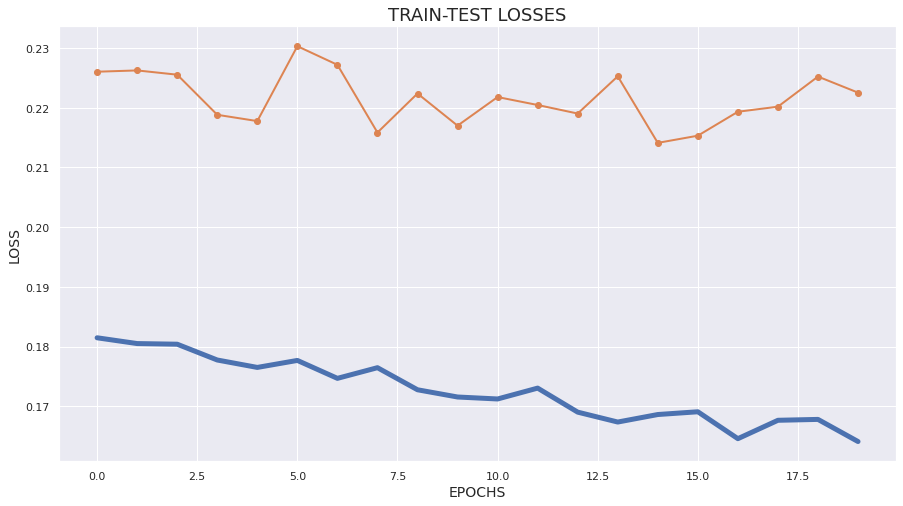

In [95]:
plt.figure(figsize = (15,8))

plt.title('TRAIN-TEST LOSSES',fontsize = 18)

plt.plot([i for i in range(EPOCHS)],
         history.history['loss'],
         linewidth = 5)

plt.plot([i for i in range(EPOCHS)],
         history.history['val_loss'],
         linewidth = 2,
         marker = 'o')

plt.xlabel('EPOCHS',fontsize = 14)

plt.ylabel('LOSS',fontsize = 14)

plt.show()

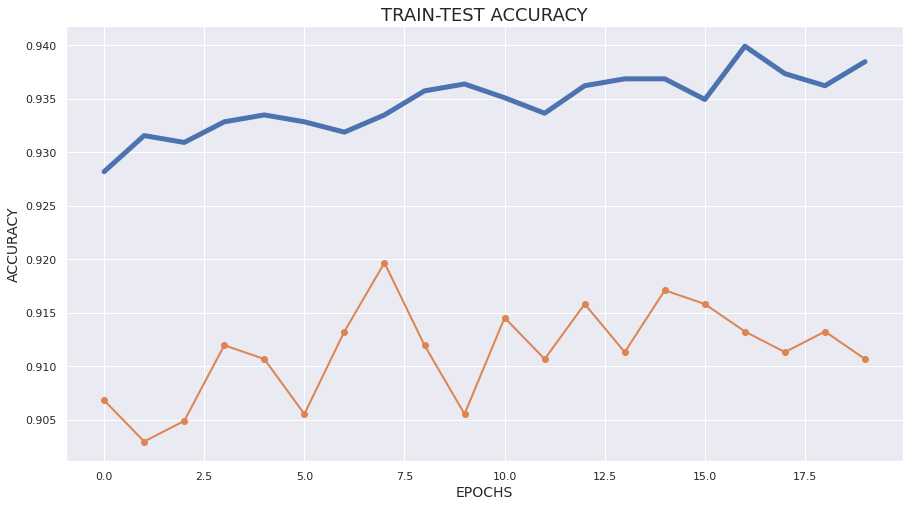

In [96]:
plt.figure(figsize = (15,8))


plt.title('TRAIN-TEST ACCURACY',fontsize = 18)

plt.plot([i for i in range(EPOCHS)], 
         history.history['binary_accuracy'],
         linewidth = 5)

plt.plot([i for i in range(EPOCHS)],
         history.history['val_binary_accuracy'],
         linewidth = 2,
         marker = 'o')

plt.xlabel('EPOCHS',fontsize = 14)

plt.ylabel('ACCURACY',fontsize = 14)

plt.show()

# 6) Model evaluation.

## Classification metrics:

In [58]:
def model_eval(model , X_test ,y_test ,model_name): 
    
    y_hat = model.predict(X_test)
    
    if len(np.unique(y_hat)) > 2:
        
        for k in range(len(y_hat)):
            
            if y_hat[k] >= 0.5 :
                
                y_hat[k] = 1
            else:
                y_hat[k] = 0        
        
    report = metrics.classification_report(y_test ,y_hat)
    
    print(f"""
    
    {model_name.upper()}
    
    {report}
    
    """)    

In [59]:
model_eval(models[0],X_test_std ,y_test , 'Support vector machine')


    
    SUPPORT VECTOR MACHINE
    
                  precision    recall  f1-score   support

           0       0.94      0.92      0.93       972
           1       0.92      0.94      0.93       973

    accuracy                           0.93      1945
   macro avg       0.93      0.93      0.93      1945
weighted avg       0.93      0.93      0.93      1945

    
    


In [60]:
model_eval(neural_net,X_test_std ,y_test , 'Neural network')


    
    NEURAL NETWORK
    
                  precision    recall  f1-score   support

           0       0.91      0.94      0.93       972
           1       0.94      0.91      0.92       973

    accuracy                           0.93      1945
   macro avg       0.93      0.93      0.93      1945
weighted avg       0.93      0.93      0.93      1945

    
    


In [61]:
model_eval(ada_clf,X_test_std ,y_test,'adaboost')


    
    ADABOOST
    
                  precision    recall  f1-score   support

           0       0.96      0.97      0.97       972
           1       0.97      0.96      0.96       973

    accuracy                           0.97      1945
   macro avg       0.97      0.97      0.97      1945
weighted avg       0.97      0.97      0.97      1945

    
    


## Confusion matrix:

In [62]:
def plot_conf_matrix(model , X_test ,y_test , model_name , cmap ):
    
    y_hat = model.predict(X_test)
    
    if len(np.unique(y_hat)) > 2:
        
        for k in range(len(y_hat)):
            
            if y_hat[k] >= 0.5 :
                
                y_hat[k] = 1
            else:
                y_hat[k] = 0   

    conf_matrix = metrics.confusion_matrix(y_test , y_hat)

    plt.figure(figsize = (10,7))

    sns.heatmap(data = conf_matrix,
                    cmap = cmap,
                    center = True,
                    robust = True,
                    fmt = '0',
                    annot = True,
                    linewidths = 5,
                    linecolor = 'black',
                    square = True)
    
    plt.title(f'{model_name}',fontsize = 18)
    plt.show()

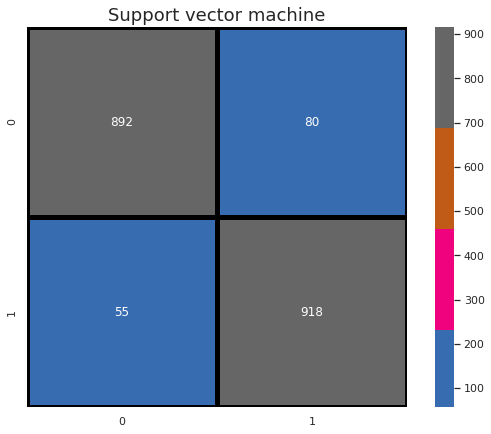

In [63]:
plot_conf_matrix(models[0],X_test_std ,y_test ,'Support vector machine' , 'Accent')

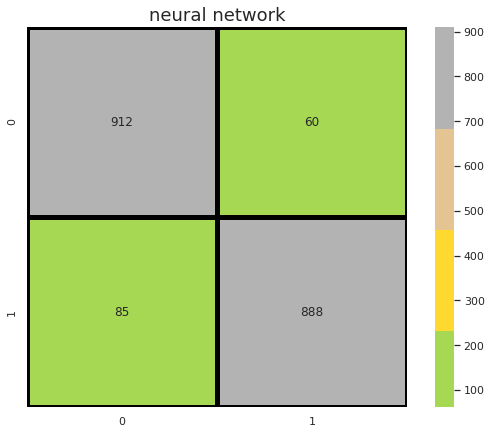

In [64]:
plot_conf_matrix(neural_net ,X_test_std ,y_test ,'neural network' , 'Set2')

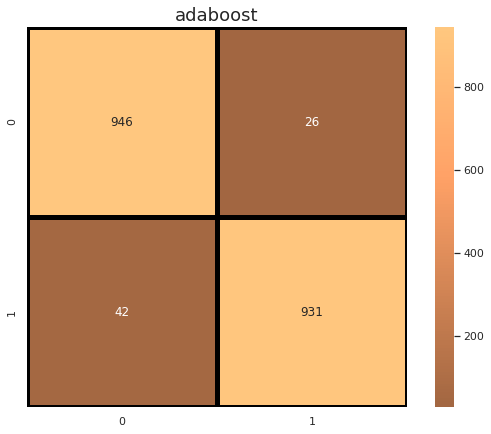

In [65]:
plot_conf_matrix(ada_clf ,X_test_std ,y_test , 'adaboost','copper')

## ROC-AUC:

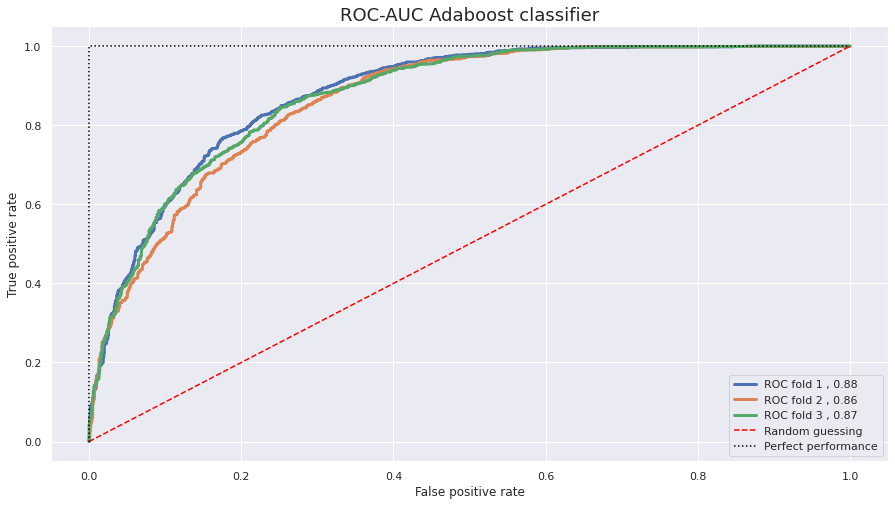

In [93]:
ada_pipe = Pipeline(steps = [('scaler' , scaler),
                             ('pca',pca),
                             ('adaboost',ada_clf)])


cv = list(StratifiedKFold(n_splits = 3 ,random_state = 101 ,shuffle = True).split(X_train , y_train))

mean_tpr = 0.0

mean_fpr = np.linspace(0,1,100)

all_tpr = []

plt.figure(figsize = (15,8))


for k ,(tr ,ts) in enumerate(cv):
    
    ada_pipe.fit(X = X_train[tr] ,y =  y_train[tr])
    
    y_pred = ada_pipe.predict_proba(X_train[ts])
    
    fpr , tpr ,thrs = metrics.roc_curve(y_train[ts],
                                        y_pred[:,1],
                                        pos_label = 1)
    
    mean_tpr += np.interp(mean_fpr ,fpr , tpr)
    
    mean_tpr[0] = 0.0
    
    roc_auc = metrics.auc(fpr,tpr)
    
    plt.plot(fpr ,tpr ,label = f'ROC fold {k + 1} , {round(roc_auc,2)}', linewidth = 3)
    
    
    
plt.plot([0,1],[0,1] , linestyle = '--', color = 'red',label = 'Random guessing')


mean_tpr /= len(cv)

mean_tpr[-1] = 1.0

mean_auc = metrics.auc(mean_fpr,mean_tpr)

plt.plot([0,0,1],[0,1,1],linestyle = ':', color = 'black',label = 'Perfect performance')
    
plt.title('ROC-AUC Adaboost classifier',fontsize = 18)
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.legend(loc = 'lower right')
plt.show()